# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [1]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

## Part1: Linear Regression

E_train is 0.038890000000000015, E_test is 0.41673359999999926


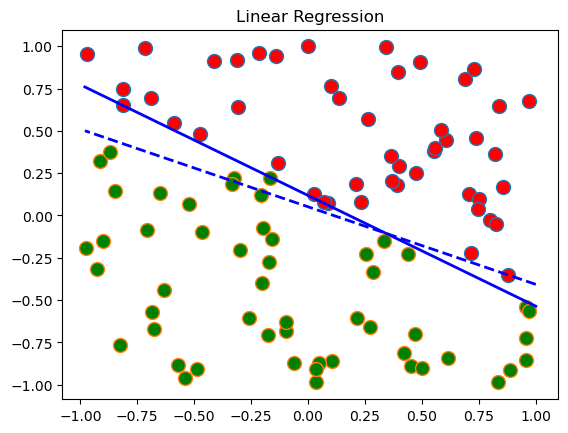

In [8]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data

E_train_sum = 0
E_test_sum = 0
nTest = 10000

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = linear_regression(X, y)
    
    # Compute training error
    y_pred_train = np.sign(w_g.T @ np.vstack([np.ones((1, X.shape[1])), X]))
    E_train = np.mean(y_pred_train != y)
    E_train_sum += E_train
    
    # Compute testing error
    X_test, y_test, _ = mkdata(nTest)
    y_pred_test = np.sign(w_g.T @ np.vstack([np.ones((1, X_test.shape[1])), X_test]))
    E_test = np.mean(y_pred_test != y_test)
    E_test_sum += E_test

E_train = E_train_sum / nRep
E_test = E_test_sum / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression');

## Part2: Linear Regression: noisy

E_train is 0.13278000000000004, E_test is 0.43504129999999996


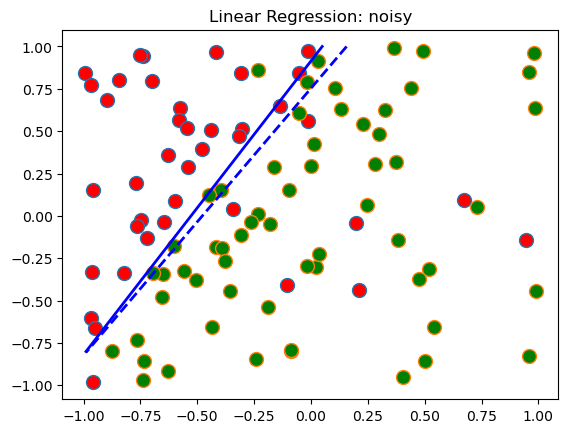

In [7]:
nRep = 1000; # number of replicates
nTrain = 100; # number of training data

E_train_sum = 0
E_test_sum = 0
nTest = 10000

for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = linear_regression(X, y)
    
    # Compute training error
    y_pred_train = np.sign(w_g.T @ np.vstack([np.ones((1, X.shape[1])), X]))
    E_train = np.mean(y_pred_train != y)
    E_train_sum += E_train
    
    # Compute testing error
    X_test, y_test, _ = mkdata(nTest, 'noisy')
    y_pred_test = np.sign(w_g.T @ np.vstack([np.ones((1, X_test.shape[1])), X_test]))
    E_test = np.mean(y_pred_test != y_test)
    E_test_sum += E_test

E_train = E_train_sum / nRep
E_test = E_test_sum / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression: noisy');

## Part3: Linear Regression: poly_fit

In [ ]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)

# Compute training, testing error
y_pred_train = np.sign(w.T @ np.vstack([np.ones((1, X.shape[1])), X]))
E_train = np.mean(y_pred_train != y)

y_pred_test = np.sign(w.T @ np.vstack([np.ones((1, X_test.shape[1])), X_test]))
E_test = np.mean(y_pred_test != y_test)

print('Linear: E_train is {}, E_test is {}'.format(E_train, E_test))

# poly_fit with transform
X_t = np.vstack([X, X**2, X**3])  # Add polynomial features: x, x^2, x^3
X_test_t = np.vstack([X_test, X_test**2, X_test**3])  # Same transform for test
w = linear_regression(X_t, y)

# Compute training, testing error
y_pred_train = np.sign(w.T @ np.vstack([np.ones((1, X_t.shape[1])), X_t]))
E_train = np.mean(y_pred_train != y)

y_pred_test = np.sign(w.T @ np.vstack([np.ones((1, X_test_t.shape[1])), X_test_t]))
E_test = np.mean(y_pred_test != y_test)

print('Polynomial: E_train is {}, E_test is {}'.format(E_train, E_test))

## Part4: Logistic Regression

E_train is 0.022899999999999997, E_test is 0.41180300000000014


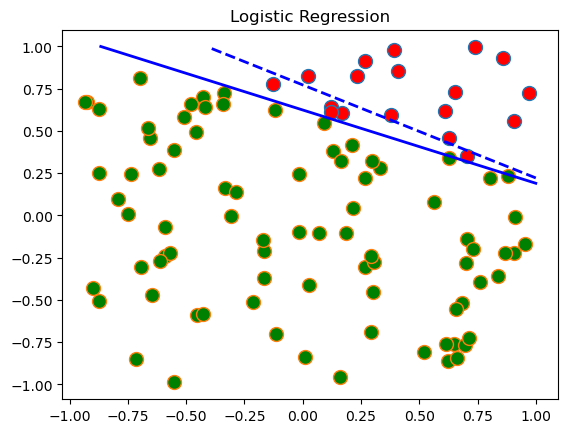

In [10]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data

E_train_sum = 0
E_test_sum = 0
nTest = 10000

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    # Convert labels from {-1, 1} to {0, 1} for logistic regression
    y_logistic = (y + 1) / 2
    w_g = logistic(X, y_logistic)
    
    # Compute training error
    # Convert w_g back to {-1, 1} format for evaluation
    y_pred_train = np.sign(w_g.T @ np.vstack([np.ones((1, X.shape[1])), X]))
    E_train = np.mean(y_pred_train != y)
    E_train_sum += E_train
    
    # Compute testing error
    X_test, y_test, _ = mkdata(nTest)
    y_pred_test = np.sign(w_g.T @ np.vstack([np.ones((1, X_test.shape[1])), X_test]))
    E_test = np.mean(y_pred_test != y_test)
    E_test_sum += E_test

E_train = E_train_sum / nRep
E_test = E_test_sum / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part5: Logistic Regression: noisy

E_train is 0.12020000000000003, E_test is 0.42241900000000016


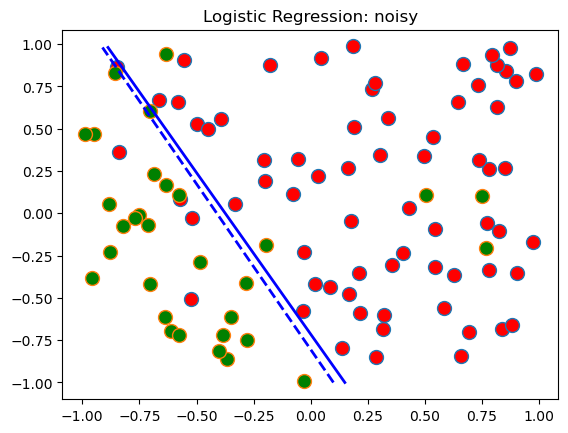

In [11]:
# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 10000; # number of training data

E_train_sum = 0
E_test_sum = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    # Convert labels from {-1, 1} to {0, 1} for logistic regression
    y_logistic = (y + 1) / 2
    w_g = logistic(X, y_logistic)
    
    # Compute training error
    # Convert w_g back to {-1, 1} format for evaluation
    y_pred_train = np.sign(w_g.T @ np.vstack([np.ones((1, X.shape[1])), X]))
    E_train = np.mean(y_pred_train != y)
    E_train_sum += E_train
    
    # Compute testing error
    X_test, y_test, _ = mkdata(nTest, 'noisy')
    y_pred_test = np.sign(w_g.T @ np.vstack([np.ones((1, X_test.shape[1])), X_test]))
    E_test = np.mean(y_pred_test != y_test)
    E_test_sum += E_test

E_train = E_train_sum / nRep
E_test = E_test_sum / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part6: SVM

In [ ]:
from svm import svm

nRep = 1000; # number of replicates
nTrain = 100; # number of training data

E_train_sum = 0
E_test_sum = 0
nTest = 10000
num_sv_sum = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, num_sc = svm(X, y)
    
    # Compute training error
    y_pred_train = np.sign(w_g.T @ np.vstack([np.ones((1, X.shape[1])), X]))
    E_train = np.mean(y_pred_train != y)
    E_train_sum += E_train
    
    # Compute testing error
    X_test, y_test, _ = mkdata(nTest)
    y_pred_test = np.sign(w_g.T @ np.vstack([np.ones((1, X_test.shape[1])), X_test]))
    E_test = np.mean(y_pred_test != y_test)
    E_test_sum += E_test
    
    # Sum up number of support vectors
    num_sv_sum += num_sc

E_train = E_train_sum / nRep
E_test = E_test_sum / nRep
avgNum = num_sv_sum / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')